In [6]:
import numpy as np
import torch
from torchvision import transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import random
import nltk

from data_loader import *
import cv2
from utils import *
from models import *
# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

img_path = '../data/flickr30k-images'
ann_path = '../data/results_20130124.token'

dataset = Flickr30kData(img_root=img_path,
                       ann_file=ann_path,
                       transform=transform,
                       fetch_mode='default',
                       mode="test",
                       disp_mode="imgcapretrieval",
                       num_test=1)

Total Images 1000
JUST CAPTIONS 4556


In [8]:
def load_model(model_path='model_13epochs_sumboth.tar',map_location='cpu'):
    image_model = VGG19(pretrained=True)
    caption_model = LSTMBranch()
    checkpoint = torch.load(model_path, map_location)
    start_epoch = checkpoint['epoch']
    best_loss = checkpoint['best_loss']
    image_model.load_state_dict(checkpoint['image_model'])
    caption_model.load_state_dict(checkpoint['caption_model'])
    print ("Loaded checkpoint '{}' (epoch {})".format(model_path,checkpoint['epoch']))
    return image_model, caption_model

def gen_matchmap(image_model, caption_model, image_tensor, caption_tensor):
    image_op = image_model(image_tensor)
    caption_op = caption_model(caption_tensor)

    n_imgs = image_op.size(0)
    matchmap_list = []

    for i in range(n_imgs):
        matchmap = matchmap_generate(image_op[i],caption_op[i])
        mm = matchmap.detach().numpy()
        matchmap_list.append(mm)

    return matchmap_list

def get_output(image_tensor,image_model,caption_glove_tensor,caption_model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_model = image_model.to(device)
    caption_model = caption_model.to(device)
    image_model.eval()
    caption_model.eval()
    image_ip_val = image_tensor.to(device)
    all_caption_output_val=[]
    caption_glove_ip_val = caption_glove_tensor.to(device)
    caption_output_val = caption_model(caption_glove_ip_val)
    image_output_val = image_model(image_ip_val)
    print ("Sanity Check ---> Size of the output tensor from LSTM ",caption_output_val.shape)
    print ("Sanity Check ---> Size of the output tensor from Image Model ",image_output_val.shape)
    return image_output_val, caption_output_val

def get_sim_mat(image_output,caption_glove_tensor_output,score_type):
    sim_mat=[]
    for captiontensor in caption_glove_tensor_output:
        captiontensor = torch.unsqueeze(captiontensor,dim=0)
        sim_val = compute_matchmap_similarity_matrix(image_output,captiontensor,score_type)
        sim_mat.append(sim_val)
    return sim_mat

In [9]:
def get_data(batch_size):
    data_loader = data.DataLoader(dataset=dataset,
                                  batch_size=1,
                                  shuffle=True)

    dataloader_iterator = iter(data_loader)

    for i in range(len(dataset)):
        img, caption_gloves, caption, groundtruth = next(dataloader_iterator)
        break
    return img,caption_gloves,caption,groundtruth

Loaded checkpoint 'model_13epochs_sumboth.tar' (epoch 13)
$$$$$$$$$$$$$$$$$$$$$$ torch.Size([3, 224, 224])
Sanity Check ---> Size of the output tensor from LSTM  torch.Size([4556, 22, 1024])
Sanity Check ---> Size of the output tensor from Image Model  torch.Size([1, 1024, 14, 14])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) tor

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SI

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SI

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SI

IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SI

IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SI

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 1024])
BATCH SIZE 1
IDX
torch.Size([1024, 14, 14]) torch.Size([22, 10

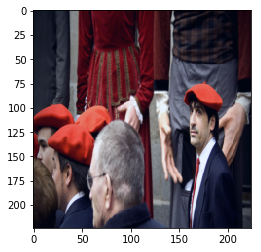

In [14]:
image_model, caption_model = load_model()
batch_size = 64
score_type = 'Avg_Both'
image_tensor,caption_glove_list,captions,ground_truth_captions = get_data(1)

img = torch.squeeze(image_tensor,0)
img = img.permute(1,2,0)
color_img = img.numpy()
color_img = (color_img - np.amin(color_img)) / np.ptp(color_img)
plt.imshow(color_img)

new_caption = torch.squeeze(caption_glove_list,dim=0)

image_output, caption_glove_tensor_output = get_output(image_tensor,image_model,new_caption,caption_model)
sim_mat = get_sim_mat(image_output,caption_glove_tensor_output,score_type)
sim_mat = torch.Tensor(sim_mat)
#C2I_scores, C2I_ind = sim_mat.topk(1,0)
I2C_scores, I2C_ind = sim_mat.topk(5,0)

#recall_values=calc_recalls(image_output,caption_glove_tensor_output,score_type)

#print ("**********************************")
#print ("The Recall Scores are:")
#print (recall_values)
#print ("**********************************")

print ("**************************************************")
print ("The Ground Truth Captions are:")
k=1
for gtcaption in ground_truth_captions:
    print (k,": ",gtcaption[0])
    k=k+1
print ("**************************************************")

print ("**************************************************")
k=1
print ("The predicted captions are:")
for captid in I2C_ind:
    print (k,": ",captions[captid][0])
    k=k+1
print ("**************************************************")

In [15]:
image_tensor.shape

torch.Size([1, 3, 224, 224])

In [16]:
caption_glove_tensor_output[0]

tensor([[ 0.0235,  0.0180,  0.0073,  ..., -0.0535, -0.0121, -0.0805],
        [ 0.0566,  0.0293,  0.0494,  ..., -0.0205, -0.0236, -0.0006],
        [ 0.0243,  0.0017,  0.0173,  ...,  0.0077, -0.0214,  0.0268],
        ...,
        [-0.0097,  0.0556, -0.0362,  ..., -0.0707,  0.0501, -0.0032],
        [-0.0066,  0.0653, -0.0458,  ..., -0.0934,  0.0609, -0.0128],
        [-0.0036,  0.0698, -0.0507,  ..., -0.1074,  0.0685, -0.0198]],
       grad_fn=<SelectBackward>)